# FIFA WORLD CUP history: Goals, Games, and Graphs

## 2024-25 Individual Assessment

*This is the MN5813 Individual Assignment.*
- Candidate number: 2601587

[Link](https://github.com/99DJ89/MN5813--Individual--project) link for the Github (https://github.com/99DJ89/MN5813--Individual--project)

<img src="Data/adobe-express-qr-code.png" width="150" height="150">


## Project summary

In [ ]:
# Add your project summary here [app. 200-250 words]

## Generative AI


This project is done manually. However we used AI to help us genetate ideas for improving work.

For example, we also used AI to understand the following:

how to correct some errors that occurred during the way that we couldn't cope with
what relative path is in order to collaborate effectivily as a team when sharing our Jupiter Notebooks with each other
how to remove index in some outputs from the display
AI assistance was provided using:

1) Perplexity AI (Pro subscription), which uses large language models such as Sonar (Perplexity, based on Llama 3.1 70B), GPT‑5.1 (OpenAI), Claude Sonnet 4.5 (Anthropic), and Gemini 3 Pro (Google DeepMind) via Perplexity’s model selector. Provider - Perplexity AI, Inc.

2) ClaudeAI, Version: Claude Sonnet 3.5, an AI language model developed by Anthropic.

## Introduction


Football is more than a sport; it is an obsession and a universal language that brings together over 3.5 billion fans across the globe. While mega-sport events involve massive financial outlays, their true power lies in the emotional connections and cultural bridges they build between different civilizations. For a host nation like Qatar, the 2022 World Cup represented a historic milestone and an opportunity to move beyond its reputation as a resource-rich state to introduce the world to its living heritage and traditional hospitality.

The profound reality of these events is often found in the personal stories that take place away from the scoreboard. For example, a couple from Brazil named Pedro and Ana initially hesitated to travel to the Middle East due to anxieties fueled by negative media portrayals. However, their experience was transformed not by the architecture, but by genuine human interactions, such as a local resident returning a lost wallet or an invitation to a traditional family dinner. These moments prove that a destination’s image is most effectively reshaped through direct engagement and the breaking of long-held stereotypes.

The event's "heart and soul" were the 20,000 volunteers who originated from 150 different countries to facilitate the tournament. For volunteers like Tariro and Tafara, a mother and son from Zimbabwe, the experience was a journey of personal growth that allowed them to step beyond their comfort zones and find unity in a diverse global community. This "soft power" of human connection helps decrease international misunderstandings and replaces "otherness" with mutual respect.

Ultimately, the legacy of a mega-event is not just the $220 billion in infrastructure, but the collective pride and joy shared by the community. By satisfying the human need for safety, belonging, and shared celebration, a country can redefine its global identity and leave a lasting, positive impression on the world.

Data source for our project is a dataset on Kaggle ="https://www.kaggle.com/datasets/abecklas/fifa-world-cup".
# Aim:
The aim of this project is to explore a historical dataset on the FIFA WorldCup, extract insights and assess trends around the FIFA WorldCup from 1930 to 2014.
# Objectives:
1. **Objective:** Understand the data To get a clear picture of the tournament's history, I will:

 - Identify the top 5 most successful World Cup nations. 
 - Calculate the total goals scored by each country.
 - Find the stadium that has hosted the largest crowds.

2. **Objective:** Visually explore the data set I want to bring the numbers to life by creating two clear visualizations:
 - A chart showing how many goals were scored in each tournament year.
 - A graph showing how stadium attendance has changed over time.

3. **Objective:** Make recommendations for future work To take this project further, I could:
 - Study individual player stats, like top scorers.
 - Look into whether being the home team actually helps a country win.
 - Try to predict future match results using the historical data I've analyzed.

## Setup

### Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set display options for better output
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)
pd.set_option("display.width", None)


### Load data

In [2]:
#data_source = "https://docs.google.com/spreadsheets/d/1Pg9ScLoN1USl0T036H0rqCYYOHJwusMVD-_q1ciiAeY/edit?usp=sharing"  # Add URL to raw data here
def load_WorldCup_data(url=None, dataset_type='WorldCupMatches'):
    """
    Downloads the dataset for Individual project
    and saves it locally (requires Internet connection!).
    
    Source: https://github.com/99DJ89/MN5813--Individual--project
       
    Parameters:
        url: [optional] url of the data file.
             If none specified, uses default based on dataset_type.
        dataset_type: [optional] 'WorldCupMatches' or 'WorldCupPlayers' or 'WorldCups'
             Determines which default dataset to download.
             
    Returns:
        str: Path to the downloaded CSV file
    """
    import urllib.request
    from pathlib import Path
    
    # Define default URLs for both datasets
    default_urls = {
        'WorldCupMatches': "https://raw.githubusercontent.com/99DJ89/MN5813--Individual--project/refs/heads/main/Data/WorldCupMatches.csv",
        'WorldCupPlayers': "https://raw.githubusercontent.com/99DJ89/MN5813--Individual--project/refs/heads/main/Data/WorldCupPlayers.csv",
        'WorldCups': "https://raw.githubusercontent.com/99DJ89/MN5813--Individual--project/refs/heads/main/Data/WorldCups.csv"
    }
    
    # Use provided URL or default based on dataset_type
    if not url:
        url = default_urls.get(dataset_type, default_urls['WorldCupMatches'])
            
    # Define default output path
    output_dir = Path("assets/data")
    output_name = url.split('/')[-1]
    output_path = output_dir / output_name
    
    # Skip download if file already exists
    if output_path.exists():
        print(f"File already exists: {output_path}")
        print("Will not proceed with downloading!")
        return str(output_path)
    
    # Create directory structure
    print(f"Creating directory: {output_dir}")
    output_dir.mkdir(parents=True, exist_ok=True)
    
    print(f"Downloading dataset ...\n{output_path}")
    req = urllib.request.Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    
    with urllib.request.urlopen(req, timeout=60) as response:
        data = response.read()
        with open(output_path, 'wb') as f:
            f.write(data)
        print(f"Dataset saved as: {output_path}")
    
    return str(output_path)

In [3]:
# Download WorldCupMatches.csv
Matches_data_path = load_WorldCup_data(dataset_type='WorldCupMatches')

# Download WorldCupPlayers.csv
Players_data_path = load_WorldCup_data(dataset_type='WorldCupPlayers')

# Download WorldCups.csv
WorldCup_data_path = load_WorldCup_data(dataset_type='WorldCups')

File already exists: assets\data\WorldCupMatches.csv
Will not proceed with downloading!
File already exists: assets\data\WorldCupPlayers.csv
Will not proceed with downloading!
File already exists: assets\data\WorldCups.csv
Will not proceed with downloading!


When we started working on the project we downloaded Zip file from Kaggle to our laptops and created relative path.

We extracted zip and found two csv files in the folder:

 - WorldCupMatches
 - WorldCupPlayers
 - WorldCups

### Convert into DataFrame

- I use `pd.read_csv()` to convert data from both files found in MN583 Group2 folder into Pandas DataFrames, And we use relative paths to the data for consistency.
- First I want to know how many rows and columns in our both data sets and names of the columns.
- I use `len(data_frame)` to find how many rows in our data sets; `len(data_frame.columns)` to find the number of columns and `list(data_frame.columns)` to list names of all the columns in our data sets.

In [4]:
# Your code here
WorldCupMatches = df = pd.read_csv("Data/WorldCupMatches.csv")
WorldCupPlayers = schema_df = pd.read_csv("Data/WorldCupPlayers.csv")
WorldCups = schema_df = pd.read_csv("Data/WorldCups.csv")

print(f"Dataset'WorldCupMatches' loaded: {len(WorldCupMatches)} rows, {len(WorldCupMatches.columns)} columns")
print(f"\nColumn names:\n{list(WorldCupMatches.columns)}")

print(f"Dataset'WorldCupPlayers' loaded: {len(WorldCupPlayers)} rows, {len(WorldCupPlayers.columns)} columns")
print(f"\nColumn names:\n{list(WorldCupPlayers.columns)}")

print(f"Dataset'WorldCups' loaded: {len(WorldCups)} rows, {len(WorldCups.columns)} columns")
print(f"\nColumn names:\n{list(WorldCups.columns)}")



Dataset'WorldCupMatches' loaded: 852 rows, 20 columns

Column names:
['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name', 'Home Team Goals', 'Away Team Goals', 'Away Team Name', 'Win conditions', 'Attendance', 'Half-time Home Goals', 'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2', 'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials']
Dataset'WorldCupPlayers' loaded: 37784 rows, 9 columns

Column names:
['RoundID', 'MatchID', 'Team Initials', 'Coach Name', 'Line-up', 'Shirt Number', 'Player Name', 'Position', 'Event']
Dataset'WorldCups' loaded: 20 rows, 10 columns

Column names:
['Year', 'Country', 'Winner', 'Runners-Up', 'Third', 'Fourth', 'GoalsScored', 'QualifiedTeams', 'MatchesPlayed', 'Attendance']


In [5]:
# SUGGESTION: Merge data from multiple files into a single DataFrame
#df = pd.merge(WorldCupMatches, WorldCupPlayers, WorldCups, on="NOC", how="left")
#df = WorldCupMatches.merge(WorldCupPlayers, on="NOC", how="left") \
                     #.merge(WorldCups, on="NOC", how="left")
# Example: Merge based on Year
df = WorldCupMatches.merge(WorldCups, on="Year", how="left") \
                     .merge(WorldCupPlayers, on="MatchID", how="left")

# Or if the column names differ:
df = WorldCupMatches.merge(WorldCups, left_on="Year", right_on="Year", how="left")


In [6]:
print("First 10 rows:")
# df.head(10)
print(df.shape)


First 10 rows:
(852, 29)


Display the first few rows and basic information about the DataFrame `df` you have created from `data_source`.

In [7]:
# print(df.head())
#print(df.head(10))
display (df.head(10))

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance_x,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance_y
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
5,1930,16 Jul 1930 - 14:45,Group 1,Parque Central,Montevideo,Chile,3,0,Mexico,,9249.0,1,0,CRISTOPHE Henry (BEL),APHESTEGUY Martin (URU),LANGENUS Jean (BEL),201,1095,CHI,MEX,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
6,1930,17 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,4,0,Bolivia,,18306.0,0,0,MATEUCCI Francisco (URU),LOMBARDI Domingo (URU),WARNKEN Alberto (CHI),201,1092,YUG,BOL,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
7,1930,17 Jul 1930 - 14:45,Group 4,Parque Central,Montevideo,USA,3,0,Paraguay,,18306.0,2,0,MACIAS Jose (ARG),APHESTEGUY Martin (URU),TEJADA Anibal (URU),201,1097,USA,PAR,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
8,1930,18 Jul 1930 - 14:30,Group 3,Estadio Centenario,Montevideo,Uruguay,1,0,Peru,,57735.0,0,0,LANGENUS Jean (BEL),BALWAY Thomas (FRA),CRISTOPHE Henry (BEL),201,1099,URU,PER,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
9,1930,19 Jul 1930 - 12:50,Group 1,Estadio Centenario,Montevideo,Chile,1,0,France,,2000.0,0,0,TEJADA Anibal (URU),LOMBARDI Domingo (URU),REGO Gilberto (BRA),201,1094,CHI,FRA,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549


In [8]:
# print(df.info())
#print(df.info())
#display (df.info())
print ("Dataset Info:")
print (WorldCupMatches.info())
print ("\n" + "="*50), display ("\nDataset Description:")
print (WorldCupMatches.describe())
print ("\n" + "="*50)
print ("\nColumn Names:")
print (WorldCupMatches.columns.tolist())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    int64  
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    int64  
 7   Away Team Goals       852 non-null    int64  
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    int64  
 12  Half-time Away Goals  852 non-null    int64  
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant

'\nDataset Description:'

              Year  Home Team Goals  Away Team Goals     Attendance  \
count   852.000000       852.000000       852.000000     850.000000   
mean   1985.089202         1.811033         1.022300   45164.800000   
std      22.448825         1.610255         1.087573   23485.249247   
min    1930.000000         0.000000         0.000000    2000.000000   
25%    1970.000000         1.000000         0.000000   30000.000000   
50%    1990.000000         2.000000         1.000000   41579.500000   
75%    2002.000000         3.000000         2.000000   61374.500000   
max    2014.000000        10.000000         7.000000  173850.000000   

       Half-time Home Goals  Half-time Away Goals       RoundID       MatchID  
count            852.000000            852.000000  8.520000e+02  8.520000e+02  
mean               0.708920              0.428404  1.066177e+07  6.134687e+07  
std                0.937414              0.691252  2.729613e+07  1.110572e+08  
min                0.000000             

Before I analyze anything, we need to understand what we're working with. This cell gives us three important views of our data:

1. **Dataset Info** - Shows us the structure: what type of data is in each column (numbers, text, dates), and if anything is missing
2. **Dataset Description** - Gives us statistics like average goals per match, highest attendance, etc.
3. **Column Names** - Lists all the categories of information we have

This is like opening a new toolbox and checking what tools you have before starting a project. It helps us spot any problems early and plan our analy0sis.

## Data management

### Data cleaning

#### Data cleaning is essential before analysis. We'll identify and handle:
- Missing values
- Data type issues
- Duplicates
- Outliers (if needed)

In [9]:
# TODO: Handle missing values
missing = WorldCupMatches.isnull().sum()
missing_pct = (WorldCupMatches.isnull().sum() / len(WorldCupMatches) * 100).round(1)

missing_summary = pd.DataFrame({
    "Missing_Count": missing,
    "Missing_Percent": missing_pct
})

display ("Missing values summary:")
display (missing_summary[missing_summary['Missing_Count'] > 0].sort_values("Missing_Count", ascending=False))

'Missing values summary:'

,Missing_Count,Missing_Percent
Attendance,2,0.2


## Analysis of missing values
In every category expect Attendence the missing values are:
- Missing count is 3720 
- Missing percent is 81.4%

Only in Attendece the missing count is higher by only 2 number than others.

Here we're checking for "holes" in our data - missing information. Imagine you have a form where some people didn't fill in all the fields.

The `.isnull().sum()` function counts how many missing values each column has. We only display columns that actually have missing data (where the count is greater than 0). This is important because missing data can affect our analysis. 

For example, if attendance numbers are missing for some matches, our average attendance calculation might be wrong. Knowing what's missing helps us decide how to handle it - should we fill it in with estimates, remove those rows, or leave it as is?




In [10]:
# TODO: Convert data types where necessary
display ("Current data types:")
display (df.dtypes)

'Current data types:'

Year                      int64
Datetime                 object
Stage                    object
Stadium                  object
City                     object
Home Team Name           object
Home Team Goals           int64
Away Team Goals           int64
Away Team Name           object
Win conditions           object
Attendance_x            float64
Half-time Home Goals      int64
Half-time Away Goals      int64
Referee                  object
Assistant 1              object
Assistant 2              object
RoundID                   int64
MatchID                   int64
Home Team Initials       object
Away Team Initials       object
Country                  object
Winner                   object
Runners-Up               object
Third                    object
Fourth                   object
GoalsScored               int64
QualifiedTeams            int64
MatchesPlayed             int64
Attendance_y             object
dtype: object

In [11]:
# Convert year to datetime for time-based analysis
# Note: We only have the year, not a full date
df['Year_dt'] = pd.to_datetime(df['Year'], format="%Y")

display ("Added Year_dt column:")
display(df[["Year", "Year_dt"]].head())
display (f"\nData type of year_dt: {df['Year_dt'].dtype}")

'Added Year_dt column:'

,Year,Year_dt
0,1930,1930-01-01
1,1930,1930-01-01
2,1930,1930-01-01
3,1930,1930-01-01
4,1930,1930-01-01


'\nData type of year_dt: datetime64[ns]'

### Converting data type to datetime enables:

- Time series analysis
- Extraction of decade, century
- Chronological sorting and grouping
- Date-based filtering

In [12]:
# TODO: Remove any duplicate entries
WorldCupMatches = WorldCupMatches.drop_duplicates()
print(f"After removing duplicates: {len(WorldCupMatches)} rows")

After removing duplicates: 836 rows


In [13]:
# TODO: Anything else?
df_clean = df.drop_duplicates()
print(f"Original rows: {len(df)}")
print(f"After removing duplicates: {len(df_clean)}")
print(f"Rows removed: {len(df) - len(df_clean)}")

# Use the cleaned dataset going forward
df = df_clean

Original rows: 852
After removing duplicates: 836
Rows removed: 16


In [14]:
# Convert data types
WorldCupMatches['Year'] = pd.to_numeric(WorldCupMatches['Year'], errors='coerce')
WorldCupMatches['Attendance'] = pd.to_numeric(WorldCupMatches['Attendance'], errors='coerce')
WorldCupMatches['Home Team Goals'] = pd.to_numeric(WorldCupMatches['Home Team Goals'], errors='coerce')
WorldCupMatches['Away Team Goals'] = pd.to_numeric(WorldCupMatches['Away Team Goals'], errors='coerce')
WorldCupMatches['Half-time Home Goals'] = pd.to_numeric(WorldCupMatches['Half-time Home Goals'], errors='coerce')
WorldCupMatches['Half-time Away Goals'] = pd.to_numeric(WorldCupMatches['Half-time Away Goals'], errors='coerce')

In [15]:
# Fill NaN values with 0 for goals and attendance
WorldCupMatches.fillna({
    'Home Team Goals': 0, 
    'Away Team Goals': 0, 
    'Attendance': 0,
    'Half-time Home Goals': 0,
    'Half-time Away Goals': 0
}, inplace=True)

In [16]:
# Create a total goals column
WorldCupMatches['Total Goals'] = WorldCupMatches['Home Team Goals'] + WorldCupMatches['Away Team Goals']

print("\nData cleaning completed!")
print("\nCleaned data sample:")
WorldCupMatches.head()


Data cleaning completed!

Cleaned data sample:


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Total Goals
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX,5
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL,3
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA,3
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER,4
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA,1


### This is our data cleaning phase - like washing vegetables before cooking! We're doing several important things:

1. **Removing duplicates:** If the same match appears twice in our data, we keep only one copy. This prevents counting the same match multiple times.

2. **Converting data types:** We're making sure numbers are actually stored as numbers, not text. The `pd.to_numeric()` function converts columns to numeric format. The `errors='coerce'` means if something can't be converted to a number, it becomes NaN (Not a Number) instead of causing an error.

3. **Filling missing values:** We replace any NaN values with 0 for goals and attendance. This makes sense because if data is missing, we assume no goals or no recorded attendance rather than leaving it blank.

4. **Creating new columns:** We add a 'Total Goals' column by adding home and away goals together. This makes it easier to analyze total scoring in matches.

Clean data = reliable analysis!


## Objective 1: Understand the Data
### 1.1 Top 5 Most Successful Nations

TOP 5 MOST SUCCESSFUL NATIONS (By Number of Wins)
1. Brazil               -  70 wins
2. Italy                -  45 wins
3. Argentina            -  42 wins
4. Germany FR           -  36 wins
5. Germany              -  30 wins


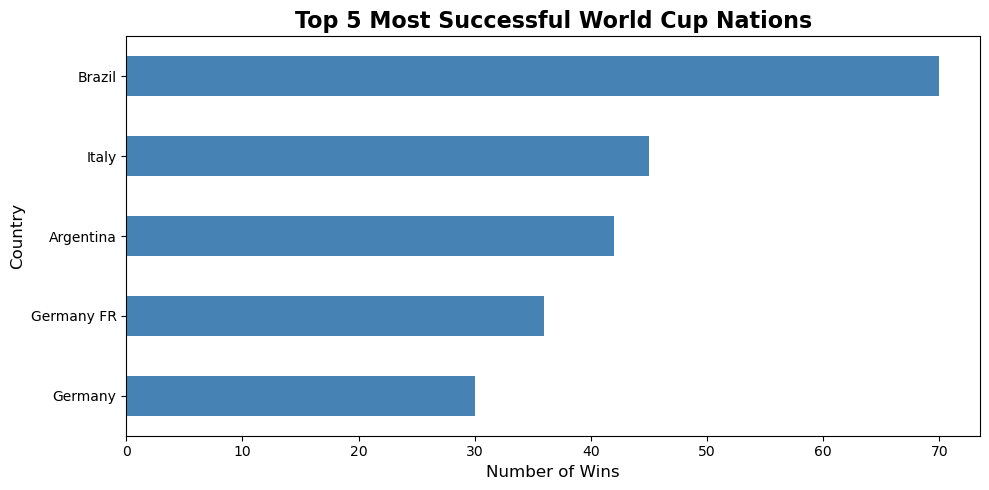

<Figure size 640x480 with 0 Axes>

In [17]:
# Top 5 Most Successful Nations
# Determine the winner of each match
def determine_winner(row):
    if row['Home Team Goals'] > row['Away Team Goals']:
        return row['Home Team Name']
    elif row['Away Team Goals'] > row['Home Team Goals']:
        return row['Away Team Name']
    else:
        return 'Draw'

WorldCupMatches['Winner'] = WorldCupMatches.apply(determine_winner, axis=1)

# Count wins (excluding draws)
wins = WorldCupMatches[WorldCupMatches['Winner'] != 'Draw']['Winner'].value_counts()
top_5_nations = wins.head(5)

print("=" * 60)
print("TOP 5 MOST SUCCESSFUL NATIONS (By Number of Wins)")
print("=" * 60)
for i, (nation, wins_count) in enumerate(top_5_nations.items(), 1):
    print(f"{i}. {nation:20s} - {wins_count:3d} wins")
print("=" * 60)

# Visualize
plt.figure(figsize=(10, 5))
top_5_nations.plot(kind='barh', color='steelblue')
plt.title('Top 5 Most Successful World Cup Nations', fontsize=16, fontweight='bold')
plt.xlabel('Number of Wins', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# Save the chart as PNG file
plt.savefig("Top 5 Most Successful World Cup Nations.png", dpi=300, bbox_inches="tight")
plt.show()


### What this section does:
Here we're finding the champions! We created a function called `determine_winner()` that looks at each match and decides who won by comparing goals. It's like a referee making the final call:

- If home team scored more → home team wins
- If away team scored more → away team wins
- If equal → it's a draw

We apply this function to every row in our dataset using `.apply()`, creating a new 'Winner' column. Then we count how many times each country appears as a winner using `.value_counts()` - it's like tallying votes.

The `.head(5)` gives us the top 5 countries with the most wins. We print this in a nice formatted table and then create a horizontal bar chart to visualize it. The chart makes it easy to see at a glance which nations dominate World Cup history. The `invert_yaxis()` puts the #1 team at the top of the chart, which feels more natural.

In the category of country **Germany FR** means **Federal Republic of Germany** and It was the official name for West Germany from 1949 to 1990.

### 1.2 Total Goals Scored by Each Country

TOTAL GOALS SCORED BY EACH COUNTRY

Top 10 Goal-Scoring Nations:
 1. Brazil               -  221 goals
 2. Argentina            -  131 goals
 3. Germany FR           -  131 goals
 4. Italy                -  128 goals
 5. France               -  106 goals
 6. Germany              -   93 goals
 7. Spain                -   92 goals
 8. Hungary              -   87 goals
 9. Netherlands          -   86 goals
10. Uruguay              -   80 goals


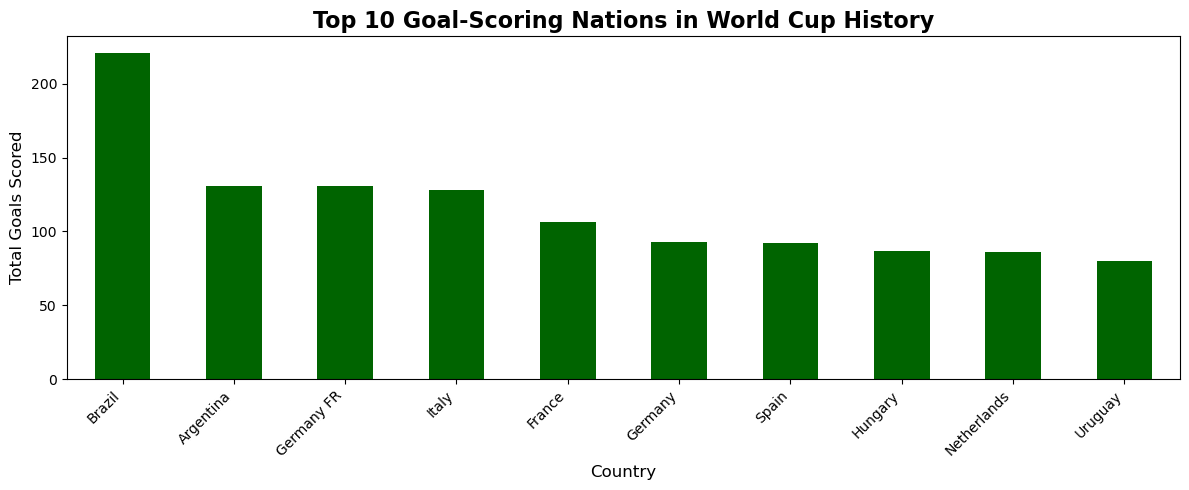

<Figure size 640x480 with 0 Axes>

In [18]:
# Calculate total goals for home and away
home_goals = WorldCupMatches.groupby('Home Team Name')['Home Team Goals'].sum()
away_goals = WorldCupMatches.groupby('Away Team Name')['Away Team Goals'].sum()

# Combine both home and away goals
total_goals = home_goals.add(away_goals, fill_value=0).sort_values(ascending=False)

print("=" * 60)
print("TOTAL GOALS SCORED BY EACH COUNTRY")
print("=" * 60)
print("\nTop 10 Goal-Scoring Nations:")
for i, (country, goals) in enumerate(total_goals.head(10).items(), 1):
    print(f"{i:2d}. {country:20s} - {int(goals):4d} goals")
print("=" * 60)

# Visualize top 10
plt.figure(figsize=(12, 5))
total_goals.head(10).plot(kind='bar', color='darkgreen')
plt.title('Top 10 Goal-Scoring Nations in World Cup History', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Goals Scored', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Save the chart as PNG file
plt.savefig("Top 10 Goal-Scoring Nations in World Cup History", dpi=300, bbox_inches="tight")
plt.show()

### This is where we calculate total goals scored by each country. But there's a trick - countries play both as home teams and away teams, so we need to count goals from both situations

Here's what we do:

1. **Group by home team:** We group all matches by 'Home Team Name' and sum up their 'Home Team Goals'. This gives us all goals scored when playing at home.
   
2. **Group by away team:** Same thing but for away matches.

3. **Combine them:** We use `.add()` with `fill_value=0` to add both together. The `fill_value=0` handles cases where a team only played home or only away (though rare).

4. **Sort:** We sort from highest to lowest using sort_values(ascending=False).

The result shows us the most prolific goal-scorers in World Cup history. We display the top 10 in both a table and a bar chart. The bar chart uses green color (fitting for a football field) and rotates the country names at 45 degrees so they don't overlap.

### 1.3 Stadium with Largest Crowds

STADIUM WITH LARGEST CROWD

Stadium: Maracani - Estidio Jornalista Mirio Filho
City: Rio De Janeiro 
Attendance: 173,850 spectators
Match: Uruguay vs Brazil
Score: 2 - 1
Year: 1950
Stage: Group 6

TOP 10 STADIUMS BY TOTAL ATTENDANCE (All Matches Combined)
 1. Estadio Azteca                      - 1,917,550 total spectators
 2. Olympiastadion                      - 815,300 total spectators
 3. Maracani - Estidio Jornalista Mirio Filho - 813,541 total spectators
 4. Wembley Stadium                     - 778,034 total spectators
 5. Rose Bowl                           - 740,807 total spectators
 6. Jalisco                             - 722,456 total spectators
 7. Stade de France                     - 704,000 total spectators
 8. Soccer City Stadium                 - 670,859 total spectators
 9. Nacional                            - 663,771 total spectators
10. El Monumental - Estadio Monumental Antonio Vespuci - 625,389 total spectators


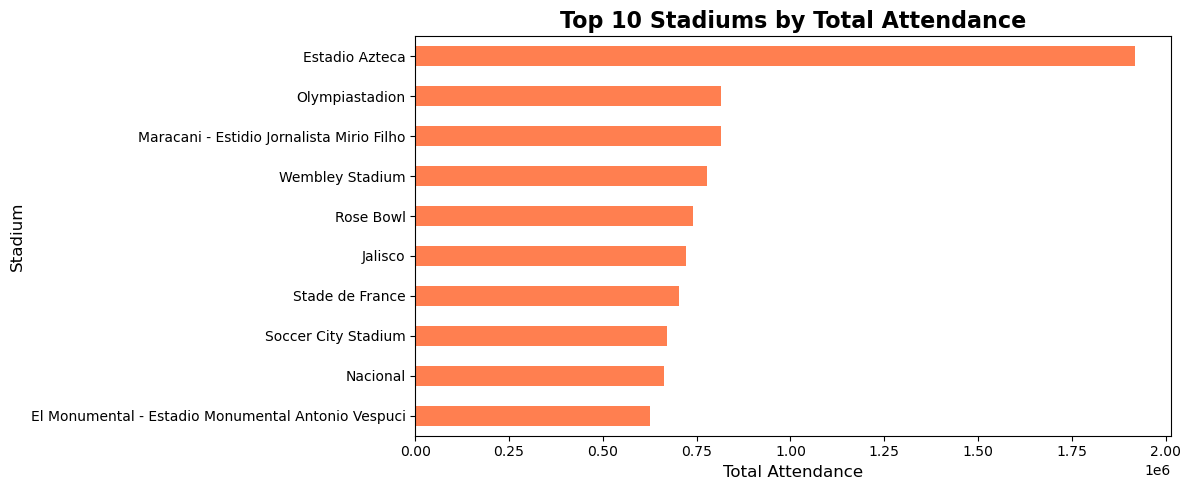

<Figure size 640x480 with 0 Axes>

In [19]:
# Stadium with Largest Crowds
# Find the match with maximum attendance
max_attendance_idx = WorldCupMatches['Attendance'].idxmax()
max_attendance_match = WorldCupMatches.loc[max_attendance_idx]

print("=" * 70)
print("STADIUM WITH LARGEST CROWD")
print("=" * 70)
print(f"\nStadium: {max_attendance_match['Stadium']}")
print(f"City: {max_attendance_match['City']}")
print(f"Attendance: {int(max_attendance_match['Attendance']):,} spectators")
print(f"Match: {max_attendance_match['Home Team Name']} vs {max_attendance_match['Away Team Name']}")
print(f"Score: {int(max_attendance_match['Home Team Goals'])} - {int(max_attendance_match['Away Team Goals'])}")
print(f"Year: {int(max_attendance_match['Year'])}")
print(f"Stage: {max_attendance_match['Stage']}")
print("=" * 70)

# Show top 10 stadiums by total attendance
stadium_attendance = WorldCupMatches.groupby('Stadium')['Attendance'].sum().sort_values(ascending=False)

print("\n" + "=" * 70)
print("TOP 10 STADIUMS BY TOTAL ATTENDANCE (All Matches Combined)")
print("=" * 70)
for i, (stadium, total_att) in enumerate(stadium_attendance.head(10).items(), 1):
    print(f"{i:2d}. {stadium:35s} - {int(total_att):,} total spectators")
print("=" * 70)

# Visualize
plt.figure(figsize=(12, 5))
stadium_attendance.head(10).plot(kind='barh', color='coral')
plt.title('Top 10 Stadiums by Total Attendance', fontsize=16, fontweight='bold')
plt.xlabel('Total Attendance', fontsize=12)
plt.ylabel('Stadium', fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Save the chart as PNG file
plt.savefig("Top 10 Stadiums by Total Attendance", dpi=300, bbox_inches="tight")
plt.show()

### Here we're finding the stadium that hosted the biggest single crowd and also looking at total attendance across all matches.

**For the single biggest crowd:**

- `.idxmax()` finds the index (row number) of the maximum attendance value
- `.loc[]` retrieves that entire row so we can see all details about that match
- We then print out everything interesting: stadium name, city, how many people attended, which teams played, the score, year, and stage of the tournament.

**For total attendance:**

- We group by stadium and sum all attendance figures for matches played there.
  
- This shows which stadiums have been most important to World Cup history overall.

- Some stadiums might not have the single biggest crowd but hosted many matches.

The visualization uses a horizontal bar chart (easier to read stadium names) in coral color. The `:,` in the print formatting adds commas to large numbers (like 79,867 instead of 79867) making them easier to read.



## Objective 2: Visually Explore the Dataset
### Data analysis
### 2.1 Goals Scored per Tournament Year


GOALS SCORED PER TOURNAMENT YEAR
Year 1930:  70 goals
Year 1934:  70 goals
Year 1938:  84 goals
Year 1950:  88 goals
Year 1954: 140 goals
Year 1958: 126 goals
Year 1962:  89 goals
Year 1966:  89 goals
Year 1970:  95 goals
Year 1974:  97 goals
Year 1978: 102 goals
Year 1982: 146 goals
Year 1986: 132 goals
Year 1990: 115 goals
Year 1994: 141 goals
Year 1998: 171 goals
Year 2002: 161 goals
Year 2006: 147 goals
Year 2010: 145 goals
Year 2014: 171 goals


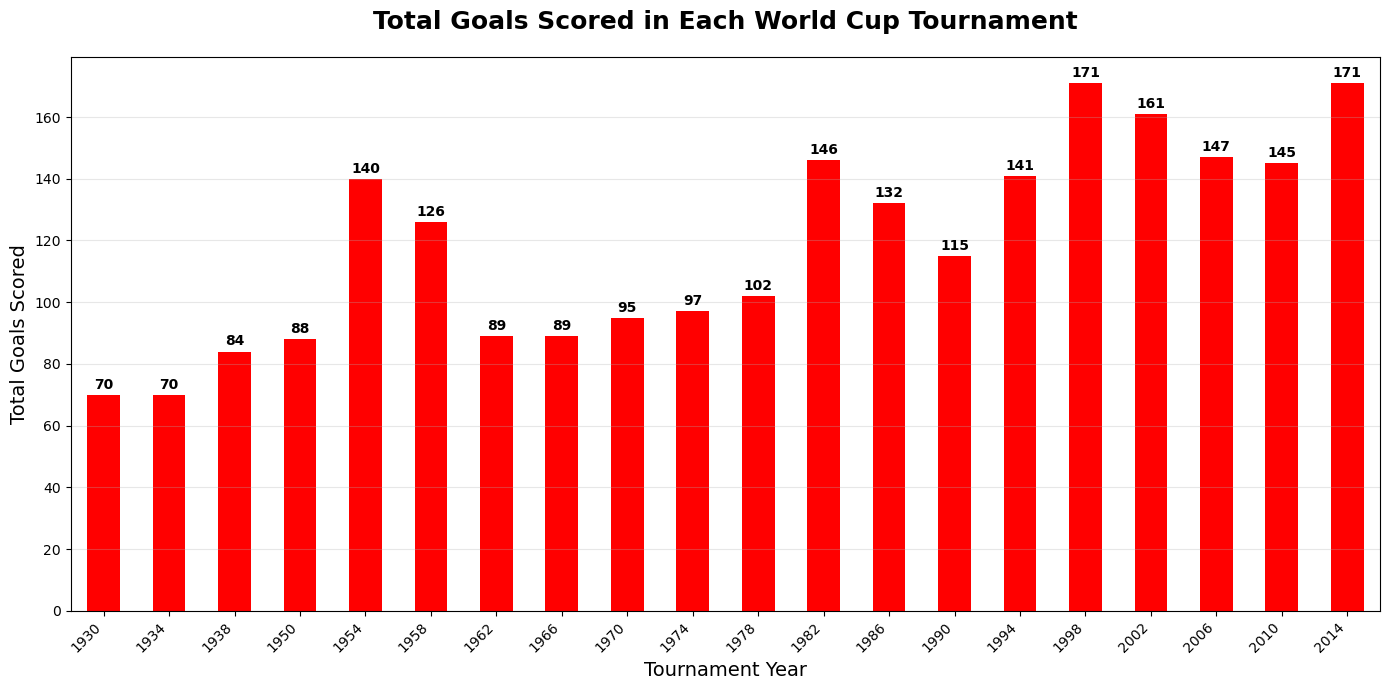


Average goals per tournament: 119.0
Highest scoring tournament: 1998 with 171 goals
Lowest scoring tournament: 1930 with 70 goals


<Figure size 640x480 with 0 Axes>

In [20]:
# TODO: Conduct data analysis
# Goals per Tournament Year
# Calculate total goals per year
goals_per_year = WorldCupMatches.groupby('Year')['Total Goals'].sum().sort_index()

print("=" * 50)
print("GOALS SCORED PER TOURNAMENT YEAR")
print("=" * 50)
for year, goals in goals_per_year.items():
    print(f"Year {int(year)}: {int(goals):3d} goals")
print("=" * 50)

# Create visualization
fig, ax = plt.subplots(figsize=(14, 7))
goals_per_year.plot(kind='bar', color='red', ax=ax)
plt.title('Total Goals Scored in Each World Cup Tournament', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Tournament Year', fontsize=14)
plt.ylabel('Total Goals Scored', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on top of bars
for i, (year, goals) in enumerate(goals_per_year.items()):
    ax.text(i, goals + 1, str(int(goals)), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Calculate some statistics
print(f"\nAverage goals per tournament: {goals_per_year.mean():.1f}")
print(f"Highest scoring tournament: {int(goals_per_year.idxmax())} with {int(goals_per_year.max())} goals")
print(f"Lowest scoring tournament: {int(goals_per_year.idxmin())} with {int(goals_per_year.min())} goals")

# Save the chart as PNG file
plt.savefig("Total Goals Scored in Each World Cup Tournament", dpi=300, bbox_inches="tight")
plt.show()

### This analysis shows us the evolution of goal-scoring across different World Cup tournaments.

**What we're doing:**

1. **Group by year:** We group all matches by year and sum up the 'Total Goals' column

2. **Sort by year:** .sort_index() puts years in chronological order (1930, 1934, etc.)

3. **Print table:** Shows exact numbers for each tournament

4. **Create bar chart:** Each bar represents one World Cup tournament, height shows total goals

**Special features of our chart:**

- We add labels on top of each bar showing the exact number (using ax.text())
- Grid lines on the y-axis help read values more easily
- Rotated x-axis labels prevent overlapping
- We calculate and display statistics: average, highest, and lowest scoring tournaments

This visualization helps us see trends - did goals increase over time? Were there particularly high or low-scoring eras? It tells the story of how the game has evolved.

### 2.2 Stadium Attendance Over Time

STADIUM ATTENDANCE STATISTICS BY YEAR
Year     Avg Attendance     Total Attendance     Matches   
--------------------------------------------------------------------------------
1930           32,808              590,549           18
1934           21,352              363,000           17
1938           20,872              375,700           18
1950           47,511            1,045,246           22
1954           29,561              768,607           26
1958           23,423              819,810           35
1962           27,911              893,172           32
1966           48,847            1,563,135           32
1970           50,124            1,603,975           32
1974           49,098            1,865,753           38
1978           40,678            1,545,791           38
1982           40,571            2,109,723           52
1986           46,039            2,394,031           52
1990           48,388            2,516,215           52
1994           68,991            3,58

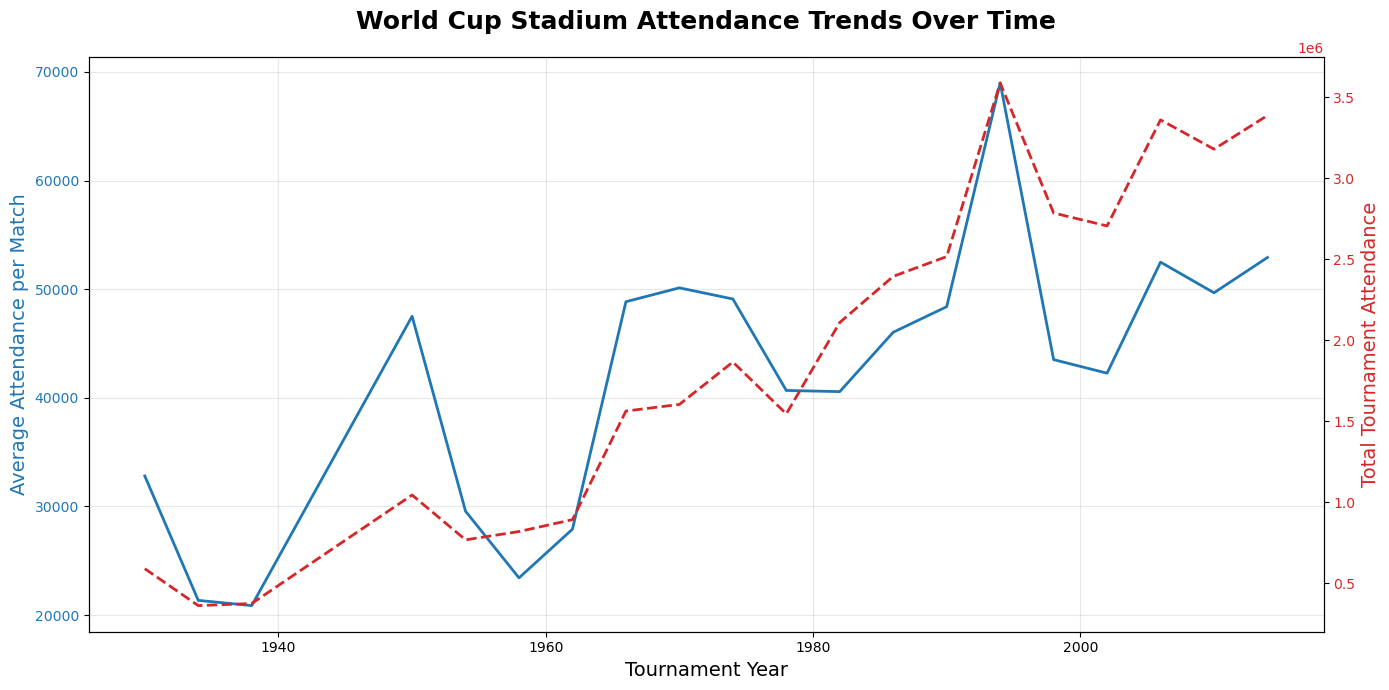


Key Insights:
Highest average attendance: 68,991 in 1994
Lowest average attendance: 20,872 in 1938
Overall average across all years: 41,852


<Figure size 640x480 with 0 Axes>

In [21]:
# Attendance Over Time
# Calculate average and total attendance per year
attendance_stats = WorldCupMatches.groupby('Year')['Attendance'].agg(['mean', 'sum', 'count'])
attendance_stats.columns = ['Average Attendance', 'Total Attendance', 'Number of Matches']

print("=" * 80)
print("STADIUM ATTENDANCE STATISTICS BY YEAR")
print("=" * 80)
print(f"{'Year':<8} {'Avg Attendance':<18} {'Total Attendance':<20} {'Matches':<10}")
print("-" * 80)
for year, row in attendance_stats.iterrows():
    print(f"{int(year):<8} {int(row['Average Attendance']):>12,}      {int(row['Total Attendance']):>15,}      {int(row['Number of Matches']):>7}")
print("=" * 80)

# Create dual-axis visualization
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot average attendance
color = 'tab:blue'
ax1.set_xlabel('Tournament Year', fontsize=14)
ax1.set_ylabel('Average Attendance per Match', fontsize=14, color=color)
ax1.plot(attendance_stats.index, attendance_stats['Average Attendance'], 
         color=color, linewidth=2, label='Average Attendance')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, alpha=0.3)

# Create second y-axis for total attendance
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Total Tournament Attendance', fontsize=14, color=color)
ax2.plot(attendance_stats.index, attendance_stats['Total Attendance'], 
         color=color, linewidth=2, linestyle='--', label='Total Attendance')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('World Cup Stadium Attendance Trends Over Time', fontsize=18, fontweight='bold', pad=20)
fig.tight_layout()
plt.show()

# Print insights
print("\nKey Insights:")
print(f"Highest average attendance: {int(attendance_stats['Average Attendance'].max()):,} in {int(attendance_stats['Average Attendance'].idxmax())}")
print(f"Lowest average attendance: {int(attendance_stats['Average Attendance'].min()):,} in {int(attendance_stats['Average Attendance'].idxmin())}")
print(f"Overall average across all years: {int(attendance_stats['Average Attendance'].mean()):,}")

# Save the chart as PNG file
plt.savefig("World Cup Stadium Attendance Trends Over Time", dpi=300, bbox_inches="tight")
plt.show()

### This is a sophisticated visualization showing attendance trends over time. We're looking at two different metrics simultaneously:

**What we calculate:**

1. Average attendance: How many people attended each match on average in a given year.

2. Total attendance: The sum of all spectators across all matches in that tournament.

3. Number of matches: How many matches were played (tournaments expanded over time).

**Why we use a dual-axis chart:**

- Average attendance and total attendance are on very different scales (thousands vs. millions)

- A dual-axis chart lets us show both trends on the same graph without one overwhelming the other

- Blue line (left axis) = average attendance per match

- Red dashed line (right axis) = total attendance for the entire tournament

**What this tells us:**

- We can see if individual matches became more popular (average going up)

- We can see if tournaments grew bigger overall (total going up)

- Sometimes total goes up just because there are more matches, not because matches are more popular

- The table gives exact numbers for detailed analysis

This visualization reveals the growth of the World Cup as a global phenomenon.

### 2.3 Additional Visualization: Goals Distribution

GOALS DISTRIBUTION IN WORLD CUP MATCHES

Number of matches by total goals scored:
0 goals: 70 matches (8.4%)
1 goals: 157 matches (18.8%)
2 goals: 169 matches (20.2%)
3 goals: 176 matches (21.1%)
4 goals: 118 matches (14.1%)
5 goals: 73 matches (8.7%)
6 goals: 31 matches (3.7%)
7 goals: 23 matches (2.8%)
8 goals: 9 matches (1.1%)
9 goals: 5 matches (0.6%)
10 goals: 1 matches (0.1%)
11 goals: 3 matches (0.4%)
12 goals: 1 matches (0.1%)


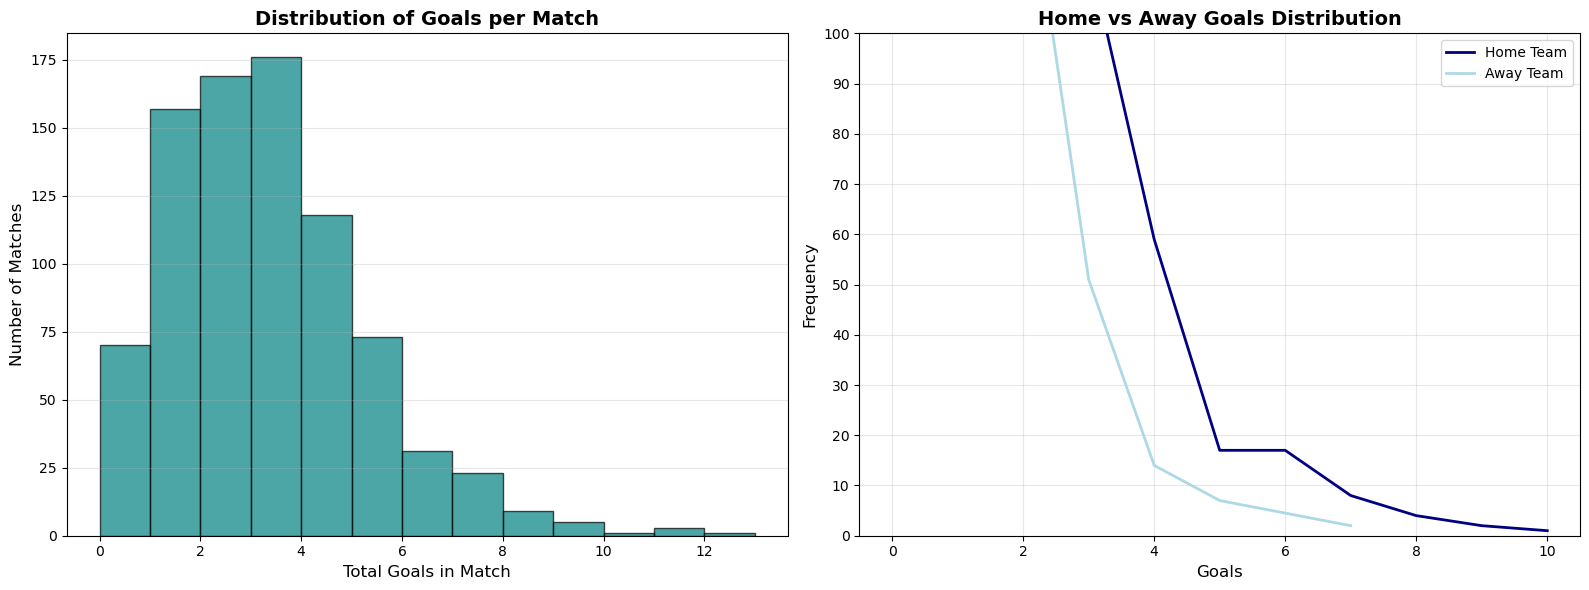


Average goals per match: 2.85
Median goals per match: 3.0
Most common score total: 3 goals
Highest scoring match: 12 goals
Percentage of matches with 0-2 goals: 47.4%
Percentage of matches with 3+ goals: 52.6%


In [60]:
# Goals Distribution Analysis
# Analyze the distribution of total goals per match
print("=" * 60)
print("GOALS DISTRIBUTION IN WORLD CUP MATCHES")
print("=" * 60)

goals_distribution = WorldCupMatches['Total Goals'].value_counts().sort_index()
print("\nNumber of matches by total goals scored:")
for goals, count in goals_distribution.items():
    print(f"{int(goals)} goals: {count} matches ({count/len(WorldCupMatches)*100:.1f}%)")

# Create histogram
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
ax1.hist(WorldCupMatches['Total Goals'], bins=range(0, int(WorldCupMatches['Total Goals'].max())+2), 
         color='teal', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Total Goals in Match', fontsize=12)
ax1.set_ylabel('Number of Matches', fontsize=12)
ax1.set_title('Distribution of Goals per Match', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Line graph
home_goals = WorldCupMatches['Home Team Goals'].value_counts().sort_index()
away_goals = WorldCupMatches['Away Team Goals'].value_counts().sort_index()

ax2.plot(home_goals.index, home_goals.values,  linewidth=2, 
         label='Home Team', color='navy')
ax2.plot(away_goals.index, away_goals.values,  linewidth=2, 
         label='Away Team', color='lightblue')

ax2.set_xlabel('Goals', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.set_title('Home vs Away Goals Distribution', fontsize=14, fontweight='bold')
ax2.set_ylim(0, 100)
ax2.set_yticks(range(0, 101, 10))
ax2.legend()
ax2.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Statistics
print(f"\nAverage goals per match: {WorldCupMatches['Total Goals'].mean():.2f}")
print(f"Median goals per match: {WorldCupMatches['Total Goals'].median():.1f}")
print(f"Most common score total: {int(WorldCupMatches['Total Goals'].mode()[0])} goals")
print(f"Highest scoring match: {int(WorldCupMatches['Total Goals'].max())} goals")
print(f"Percentage of matches with 0-2 goals: {(WorldCupMatches['Total Goals'] <= 2).sum()/len(WorldCupMatches)*100:.1f}%")
print(f"Percentage of matches with 3+ goals: {(WorldCupMatches['Total Goals'] >= 3).sum()/len(WorldCupMatches)*100:.1f}%")

### This analysis digs deeper into the scoring patterns in World Cup matches.

**Left chart (Histogram):**

- Shows how many matches had 0 goals, 1 goal, 2 goals, etc.

- The height of each bar tells us how common that score total is

- We can see if most matches are low-scoring or high-scoring

- The shape tells us about the **"typical"** World Cup match

Right chart (Line Graph):

- Shows how frequently different goal counts occur in matches

- Navy line (circles) = Home team goal frequencies

- Light blue line (squares) = Away team goal frequencies

- Higher points = that goal count happened more often

- Lower points = that goal count was rare

- Comparing the lines reveals if home teams score differently than away teams

- Y-axis ranges from 0-100 with 15-unit intervals to show frequency counts



**Statistics we calculate:**

- **Mean:** Average goals per match

- **Median:** The middle value (less affected by extreme scores)

- **Mode:** Most common total (what score happens most often)

- I also calculate what percentage of matches are low-scoring (0-2 goals) vs. high-scoring (3+)

This gives us a complete picture of what a **"typical"** World Cup match looks like in terms of goals.

## Data visualisation

In [ ]:
# TODO: Create at least two meaningful visualisations

In [ ]:
# Example visualisation (you can modify or replace this)
# plt.figure(figsize=(10, 6))
# sns.countplot(x="Medal", data=df)
# plt.title("Distribution of Medals")
# plt.show()

In [ ]:
# SUGGESTION: Use a small multiple

## Data export

In [ ]:
# TODO: Save the cleaned and wrangled DataFrame to a new CSV file

In [ ]:
# TODO: Ensure that you can successfully load the exported CSV file

In [ ]:
# TODO: Export visualizations as image files

## Conclusion

In [ ]:
# Add your conclusion here [app. 300-500 words].

## References

1. Reference 1
2. Reference 2
3. Reference 3
4. ...

*(References must be complete and contain a link to the original source; usually a DOI link.)*

## Appendices

### Appendix A

In [ ]:
# Appendix A goes here

### Appendix B

In [ ]:
# Appendix B goes here